# Investigate the augmented trajectories

## Analyze the `round_table` augmentation

### Qualitatively analyze trajectories

In [ ]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm

base_dir = Path("tmp")

In [ ]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="round_table",
    randomness="low",
)

random.shuffle(paths)

len(paths), paths[:3]

In [ ]:
# Loop over and see that I can read them all
for path in tqdm(paths):
    try:
        data = unpickle_data(path)
    except Exception as e:
        print(f"Failed to read {path}")
        print(e)

In [ ]:
for path in paths[:20]:
    mp4_from_pickle_jupyter(
        path, filename=(base_dir / path.stem).with_suffix(".mp4"), fps=20
    )

### Plot coverage of new trajectories

In [ ]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [ ]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="round_table",
        randomness="low",
    )
)

aug_path, teleop_path

In [ ]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [ ]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

### Plot the state-space coverage in 3D

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 121 for a 1x2 grid, first position
ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)
ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.savefig("figs/teleop_augmentation.png")

plt.show()

## Analyze the `lamp` augmentation

### Qualitatively analyze trajectories

In [ ]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm

base_dir = Path("tmp")

In [ ]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="lamp",
    randomness="low",
)

# random.shuffle(paths)

paths = sorted(paths, reverse=True)

len(paths), paths[:3]

In [ ]:
for path in tqdm(paths):
    data = unpickle_data(path)
    if True or data.get("critical_state", -1) == 1:
        mp4_from_pickle_jupyter(
            path, filename=(base_dir / path.stem).with_suffix(".mp4"), fps=20
        )

### Plot coverage of new trajectories

In [ ]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [ ]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="lamp",
        randomness="low",
    )
)

aug_path, teleop_path

In [ ]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Get the skill labels for the teleop data and split them into episodes
# skill_teleop = z_teleop["critical"][:]
# skill_teleop = np.split(skill_teleop, ends_teleop[:-1])

# # For the teleop data, we slice off the data after the insertion
# pos_teleop = [
#     ep[: np.where(skill == 1)[0][3] + 1] for ep, skill in zip(pos_teleop, skill_teleop)
# ]

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [ ]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

### Plot the state-space coverage in 3D

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)

ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.savefig("teleop_augmentation.pdf")

plt.show()

## Analyze the `square_table` augmentation

In [ ]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm

In [ ]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="square_table",
    randomness="low",
)

random.shuffle(paths)

len(paths), paths[:3]

In [ ]:
for path in paths[:5]:
    mp4_from_pickle_jupyter(path, filename=path.stem + ".mp4", fps=20)

### Plot coverage of new trajectories

In [ ]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [ ]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="square_table",
        randomness="low",
    )
)

aug_path, teleop_path

In [ ]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Get the skill labels for the teleop data and split them into episodes
# skill_teleop = z_teleop["critical"][:]
# skill_teleop = np.split(skill_teleop, ends_teleop[:-1])

# # For the teleop data, we slice off the data after the insertion
# pos_teleop = [
#     ep[: np.where(skill == 1)[0][3] + 1] for ep, skill in zip(pos_teleop, skill_teleop)
# ]

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [ ]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

In [ ]:
# Sample a subset of the data
idx = np.random.choice(len(pos_teleop), size=53584, replace=False)
pos_teleop = pos_teleop[idx]

### Plot the state-space coverage in 3D

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)

ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.savefig("teleop_augmentation.pdf")

plt.show()

## Analyze the `one_leg` augmentation

In [1]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm

base_dir = Path("tmp")

In [11]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="one_leg",
    randomness="low",
)

paths = sorted(paths, reverse=False)
# random.shuffle(paths)

len(paths), paths[:3]

Found the following paths:
    /data/scratch-oc40/pulkitag/ankile/furniture-data/raw/sim/one_leg/augmentation/low/success/*.pkl*


(1053,
 [PosixPath('/data/scratch-oc40/pulkitag/ankile/furniture-data/raw/sim/one_leg/augmentation/low/success/2024-02-12T15:04:48.pkl.xz'),
  PosixPath('/data/scratch-oc40/pulkitag/ankile/furniture-data/raw/sim/one_leg/augmentation/low/success/2024-02-12T15:05:05.pkl.xz'),
  PosixPath('/data/scratch-oc40/pulkitag/ankile/furniture-data/raw/sim/one_leg/augmentation/low/success/2024-02-12T15:05:22.pkl.xz')])

In [13]:
for path in paths[:50]:
    data = unpickle_data(path)
    print(len(data["observations"]))
    mp4_from_pickle_jupyter(
        path, filename=(base_dir / path.stem).with_suffix(".mp4"), fps=20
    )

68
File saved as tmp/2024-02-12T15:04:48.mp4


70
File saved as tmp/2024-02-12T15:05:05.mp4


70
File saved as tmp/2024-02-12T15:05:22.mp4


70
File saved as tmp/2024-02-12T15:05:39.mp4


69
File saved as tmp/2024-02-12T15:06:10.mp4


69
File saved as tmp/2024-02-12T15:06:48.mp4


69
File saved as tmp/2024-02-12T15:07:05.mp4


69
File saved as tmp/2024-02-12T15:09:00.mp4


69
File saved as tmp/2024-02-12T15:09:16.mp4


69
File saved as tmp/2024-02-12T15:09:32.mp4


69
File saved as tmp/2024-02-12T15:09:58.mp4


69
File saved as tmp/2024-02-12T15:10:14.mp4


69
File saved as tmp/2024-02-12T15:10:50.mp4


69
File saved as tmp/2024-02-12T15:11:06.mp4


69
File saved as tmp/2024-02-12T15:11:22.mp4


69
File saved as tmp/2024-02-12T15:12:04.mp4


69
File saved as tmp/2024-02-12T15:12:20.mp4


67
File saved as tmp/2024-02-12T15:12:36.mp4


69
File saved as tmp/2024-02-12T15:13:33.mp4


70
File saved as tmp/2024-02-12T15:13:49.mp4


68
File saved as tmp/2024-02-12T15:14:05.mp4


68
File saved as tmp/2024-02-12T15:14:31.mp4


68
File saved as tmp/2024-02-12T15:14:57.mp4


69
File saved as tmp/2024-02-12T15:15:24.mp4


69
File saved as tmp/2024-02-12T15:16:18.mp4


69
File saved as tmp/2024-02-12T15:16:33.mp4


68
File saved as tmp/2024-02-12T15:16:48.mp4


69
File saved as tmp/2024-02-12T15:17:14.mp4


68
File saved as tmp/2024-02-12T15:18:43.mp4


68
File saved as tmp/2024-02-12T15:19:09.mp4


68
File saved as tmp/2024-02-12T15:19:24.mp4


68
File saved as tmp/2024-02-12T15:19:50.mp4


67
File saved as tmp/2024-02-12T15:20:05.mp4


68
File saved as tmp/2024-02-12T15:20:41.mp4


69
File saved as tmp/2024-02-12T15:20:57.mp4


68
File saved as tmp/2024-02-12T15:21:24.mp4


69
File saved as tmp/2024-02-12T15:22:35.mp4


69
File saved as tmp/2024-02-12T15:22:50.mp4


69
File saved as tmp/2024-02-12T15:23:06.mp4


69
File saved as tmp/2024-02-12T15:23:55.mp4


70
File saved as tmp/2024-02-12T15:25:09.mp4


68
File saved as tmp/2024-02-12T15:25:25.mp4


69
File saved as tmp/2024-02-12T15:25:41.mp4


69
File saved as tmp/2024-02-12T15:25:57.mp4


69
File saved as tmp/2024-02-12T15:26:55.mp4


69
File saved as tmp/2024-02-12T15:27:20.mp4


70
File saved as tmp/2024-02-12T15:27:38.mp4


68
File saved as tmp/2024-02-12T15:28:25.mp4


68
File saved as tmp/2024-02-12T15:28:41.mp4


69
File saved as tmp/2024-02-12T15:29:18.mp4


### Plot coverage of new trajectories

In [2]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [4]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="one_leg",
        randomness="low",
    )
)

aug_path, teleop_path

Found the following paths:
    /data/scratch/ankile/furniture-data/processed/sim/one_leg/teleop/low/success.zarr
    /data/scratch/ankile/furniture-data/processed/sim/one_leg/augmentation/low/success.zarr


(PosixPath('/data/scratch/ankile/furniture-data/processed/sim/one_leg/augmentation/low/success.zarr'),
 PosixPath('/data/scratch/ankile/furniture-data/processed/sim/one_leg/teleop/low/success.zarr'))

In [5]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Get the skill labels for the teleop data and split them into episodes
# skill_teleop = z_teleop["critical"][:]
# skill_teleop = np.split(skill_teleop, ends_teleop[:-1])

# # For the teleop data, we slice off the data after the insertion
# pos_teleop = [
#     ep[: np.where(skill == 1)[0][3] + 1] for ep, skill in zip(pos_teleop, skill_teleop)
# ]

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [6]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

(50, 29020, 1040, 58324)

In [12]:
n_teleop = len(pos_teleop)
mean_len_aug = np.diff(ends_aug).mean()

In [24]:
for p in [10, 20, 30, 50]:
    # Format as percent with no decimal places
    print(
        f"{p/100:.0%} of teleop data: {n_teleop*p/100:.0f} timesteps, i.e., {n_teleop*p/100 /mean_len_aug:.0f} augmented trajectories"
    )

print()
for n in [50, 100, 150, 250]:
    print(
        f"{n} augmented trajectories: {n*mean_len_aug:.0f} timesteps, i.e., {n*mean_len_aug/n_teleop:.0%} of teleop data"
    )

10% of teleop data: 2902 timesteps, i.e., 52 augmented trajectories
20% of teleop data: 5804 timesteps, i.e., 103 augmented trajectories
30% of teleop data: 8706 timesteps, i.e., 155 augmented trajectories
50% of teleop data: 14510 timesteps, i.e., 259 augmented trajectories

50 augmented trajectories: 2804 timesteps, i.e., 10% of teleop data
100 augmented trajectories: 5608 timesteps, i.e., 19% of teleop data
150 augmented trajectories: 8412 timesteps, i.e., 29% of teleop data
250 augmented trajectories: 14020 timesteps, i.e., 48% of teleop data


(array([ 12.,  30.,  86., 149., 385., 176.,  99.,  84.,   8.,  10.]),
 array([32. , 37.1, 42.2, 47.3, 52.4, 57.5, 62.6, 67.7, 72.8, 77.9, 83. ]),
 <BarContainer object of 10 artists>)

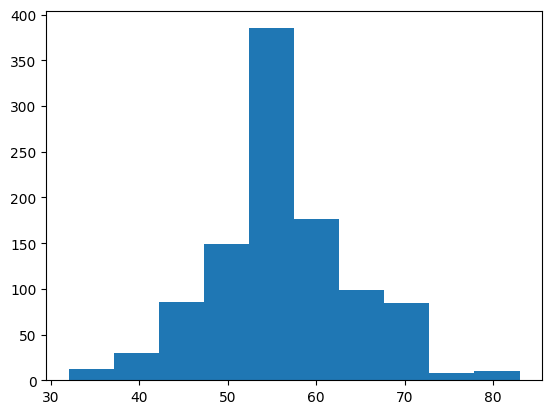

In [8]:
plt.hist(np.diff(ends_aug))

In [ ]:
# Sample a subset of the data
idx = np.random.choice(len(pos_teleop), size=53584, replace=False)
pos_teleop = pos_teleop[idx]

### Plot the state-space coverage in 3D

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)

ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.savefig("teleop_augmentation.pdf")

plt.show()

In [14]:
from src.models.unet import ConditionalUnet1D

In [16]:
net = ConditionalUnet1D(10, 272)

In [17]:
# Print the total number of parameters and parameters in each submodule
for name, param in net.named_parameters():
    print(name, param.numel())

mid_modules.0.blocks.0.block.0.weight 5242880
mid_modules.0.blocks.0.block.0.bias 1024
mid_modules.0.blocks.0.block.1.weight 1024
mid_modules.0.blocks.0.block.1.bias 1024
mid_modules.0.blocks.1.block.0.weight 5242880
mid_modules.0.blocks.1.block.0.bias 1024
mid_modules.0.blocks.1.block.1.weight 1024
mid_modules.0.blocks.1.block.1.bias 1024
mid_modules.0.cond_encoder.1.weight 1081344
mid_modules.0.cond_encoder.1.bias 2048
mid_modules.1.blocks.0.block.0.weight 5242880
mid_modules.1.blocks.0.block.0.bias 1024
mid_modules.1.blocks.0.block.1.weight 1024
mid_modules.1.blocks.0.block.1.bias 1024
mid_modules.1.blocks.1.block.0.weight 5242880
mid_modules.1.blocks.1.block.0.bias 1024
mid_modules.1.blocks.1.block.1.weight 1024
mid_modules.1.blocks.1.block.1.bias 1024
mid_modules.1.cond_encoder.1.weight 1081344
mid_modules.1.cond_encoder.1.bias 2048
diffusion_step_encoder.1.weight 262144
diffusion_step_encoder.1.bias 1024
diffusion_step_encoder.3.weight 262144
diffusion_step_encoder.3.bias 256
up_